In [156]:
import sys
import logging
from uuid import UUID

import emission.core.get_database as edb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt
import emission.storage.timeseries.abstract_timeseries as esta
import emission.net.usercache.abstract_usercache as enua
import numpy as np

logging.getLogger().setLevel(logging.DEBUG)
logging.debug(sys.path)

iphone_ids = [UUID("079e0f1a-c440-3d7c-b0e7-de160f748e35"), UUID("c76a0487-7e5a-3b17-a449-47be666b36f6"), 
              UUID("c528bcd2-a88b-3e82-be62-ef4f2396967a"), UUID("95e70727-a04e-3e33-b7fe-34ab19194f8b")]
android_ids = [UUID("e471711e-bd14-3dbe-80b6-9c7d92ecc296"), UUID("fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7"),
               UUID("86842c35-da28-32ed-a90e-2da6663c5c73"), UUID("3bc0f91f-7660-34a2-b005-5c399598a369")]

In [157]:
list(edb.get_timeseries_db().find({"metadata.key": "config/sensor_config", "data.battery_status": {"$exists": True}}).sort("metadata.write_ts").limit(10))
#edb.get_timeseries_db --> returns timeseries=MongoClient().Stage_database.Stage_timeseries

[{u'_id': ObjectId('56fadecd88f66341cb3618c9'),
  u'data': {u'android_health': u'GOOD',
   u'android_plugged': u'USB',
   u'android_technology': u'Li-ion',
   u'android_temperature': 226,
   u'android_voltage': 226,
   u'battery_level_pct': 100,
   u'battery_status': 5},
  u'metadata': {u'key': u'config/sensor_config',
   u'platform': u'android',
   u'read_ts': 1459281599.629,
   u'time_zone': u'America/Los_Angeles',
   u'type': u'sensor-data',
   u'write_fmt_time': u'2016-03-29T11:56:24.694000-07:00',
   u'write_local_dt': datetime.datetime(2016, 3, 29, 11, 56, 24, 694000),
   u'write_ts': 1459277784.694},
  u'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')},
 {u'_id': ObjectId('56faecf288f66323bcc68ee9'),
  u'data': {u'android_health': u'GOOD',
   u'android_plugged': u'USB',
   u'android_technology': u'Li-ion',
   u'android_temperature': 197,
   u'android_voltage': 197,
   u'battery_level_pct': 100,
   u'battery_status': 2},
  u'metadata': {u'key': u'config/sensor_config',
   

In [158]:
#type: list of emission.storage.timeseries.builtin_timeseries.BuiltinTimeSeries
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids)
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

In [159]:
ranges_df = pd.read_csv("../results_spring_2016/ranges.csv", error_bad_lines=False)

In [160]:
ranges_df

,start_ts,start_fmt_time,end_ts,end_fmt_time,state,android_regime,ios_regime
0,1459302151,2016-03-29T18:42:30.685000-07:00,1459310790,2016-03-29T21:06:30.275000-07:00,moving,high+1sec,best+1m
1,1459310790,2016-03-29T21:06:30.275000-07:00,1459342810,2016-03-30T06:00:09.654643-07:00,stationary,high+1sec,best+1m
2,1459342810,2016-03-30T06:00:09.654643-07:00,1459353614,2016-03-30T09:00:13.859000-07:00,charging-or-full,high+1sec,best+1m
3,1459353614,2016-03-30T09:00:13.859000-07:00,1459371719,2016-03-30T14:01:58.965395-07:00,charging-or-full,high-v-balanced+1sec-v-30sec,best-v-10m+1m-v-30m
4,1459371719,2016-03-30T14:01:58.965395-07:00,1459372435,2016-03-30T14:13:55.019000-07:00,loitering,high-v-balanced+1sec-v-30sec,best-v-10m+1m-v-30m
5,1459372435,2016-03-30T14:13:55.019000-07:00,1459373082,2016-03-30T14:24:42.464000-07:00,moving,high-v-balanced+1sec-v-30sec,best-v-10m+1m-v-30m
6,1459373082,2016-03-30T14:24:42.464000-07:00,1459376488,2016-03-30T15:21:27.670000-07:00,loitering,high-v-balanced+1sec-v-30sec,best-v-10m+1m-v-30m
7,1459376488,2016-03-30T15:21:27.670000-07:00,1459377222,2016-03-30T15:33:41.654000-07:00,moving,high-v-balanced+1sec-v-30sec,best-v-10m+1m-v-30m
8,1459377222,2016-03-30T15:33:41.654000-07:00,1459379999,2016-03-30T16:19:58.943000-07:00,loitering,high-v-balanced+1sec-v-30sec,best-v-10m+1m-v-30m
9,1459379999,2016-03-30T16:19:58.943000-07:00,1459381062,2016-03-30T16:37:41.978000-07:00,moving,high-v-balanced+1sec-v-30sec,best-v-10m+1m-v-30m


In [161]:
regime_grouped_ranges_df = ranges_df.groupby(['state', 'android_regime', 'ios_regime'])

In [162]:
#invalid_df = pd.read_csv("../results_spring_2016/invalid.csv")

In [163]:
#invalid_df

In [164]:
# *the following 3 functions are not called in this notebook*
#arguments: ts=BuiltinTimeSeries, start_ts&end_ts=timestamp in sec
#returns: DataFrame object (regarding location info) 
def get_points_from_ts_for_range(ts, start_ts, end_ts):
    return ts.get_data_df("background/location", enua.UserCache.TimeQuery('write_ts', start_ts, end_ts))

In [165]:
def get_points_for_range(ts, range_df):
    points_range_df = map(lambda row: get_points_from_ts_for_range(ts, row['start_ts'], row['end_ts']), range_df.to_dict('records'))
    return points_range_df

In [166]:
def get_points_for_group(ts_list, range_df):
    return map(lambda ts: get_points_for_range(ts, range_df), ts_list)

In [167]:
import emission.analysis.plotting.geojson.geojson_feature_converter as gfc
import emission.analysis.plotting.leaflet_osm.our_plotter as lo
import emission.analysis.plotting.leaflet_osm.ipython_helper as ipy

ImportError: No module named folium.folium

In [168]:
import scipy.interpolate as spi
import numpy as np

In [169]:
pd.options.display.float_format = '{:.3f}'.format #Limit output to 3 decimal 

In [170]:
#input: a df with columns ['ts', 'latitude', 'longitude']
#return: an interplacted (1s time resolution) df with columns ['ts', 'fmt_time', 'latitude', 'longitude']
def get_interp_df(raw_df):
    start_ts = raw_df.ts.iloc[0]
    end_ts = raw_df.ts.iloc[-1]
    #spi.interp1d() returns a function whose call method uses interpolation to find the value of new points.
    latf = spi.interp1d(x=raw_df.ts, y=raw_df.latitude, bounds_error=False)
    lngf = spi.interp1d(x=raw_df.ts, y=raw_df.longitude, bounds_error=False)
    ts_new = np.arange(int(start_ts), int(end_ts), 1)
    fmt_time_new = map(lambda ts: pydt.datetime.fromtimestamp(ts).isoformat(), ts_new)
    interp_df = pd.DataFrame({"ts": ts_new, "fmt_time": fmt_time_new,
                            "latitude": latf(ts_new), "longitude": lngf(ts_new)}, index=ts_new)
    interp_df = interp_df.dropna() #drop all rows that have any NaN values
    return interp_df

In [171]:
import emission.analysis.point_features as pf
import attrdict as ad

In [172]:
#input: 
#return: 
def calDistance(row):
    return pf.calDistance(ad.AttrDict({"latitude": row['latitude_android'], "longitude": row['longitude_android']}),
                          ad.AttrDict({"latitude": row['latitude_ios'], "longitude": row['longitude_ios']}))

In [173]:
import emission.storage.timeseries.timequery as estt

#input: android_ts/ios_ts=type "BuiltinTimeSeries", start_ts/end_ts=type "float" (unix time in seconds)

#return: 
# *a tuple (pct_retained, ground_truth_df) 
#   -pct_retained: percentage of location data with high accuracy
#   -ground_truth_df: df with location data of high accuracy (similar on ios1&iphone1-"high accuracy+fast sampling") as ground truth
# *if no location data logged --> (0, None)
def get_ground_truth(android_ts, ios_ts, start_ts, end_ts):
    # get time-queried location data (in df) for both phones
    # ios_location_data:
    #   _id|accuracy|altitude|filter|floor|fmt_time|heading|latitude|loc|local_dt|longitude|metadata_write_ts|sensed_speed|ts|vaccuracy
    # android_location_data:
    #   _id|accuracy|altitude|elapsedRealtimeNanos|filter|fmt_time|heading|latitude|loc|local_dt|longitude|metadata_write_ts|sensed_speed|ts
    time_range = estt.TimeQuery("metadata.write_ts", start_ts, end_ts)
    ios_raw_df = ios_ts.get_data_df("background/location", time_range)
    android_raw_df = android_ts.get_data_df("background/location", time_range)
    
    #ios_raw_df = ios_ts.get_data_df("background/location", enua.UserCache.TimeQuery("write_ts", start_ts, end_ts))
    #android_raw_df = android_ts.get_data_df("background/location", enua.UserCache.TimeQuery("write_ts", start_ts, end_ts))
    
    if len(ios_raw_df) == 0 or len(android_raw_df) == 0:
        return (0, None)
   
    android_df = get_interp_df(android_raw_df)
    ios_df = get_interp_df(ios_raw_df)
    
    #joine_df = joined (interpolated) location data from ios & android
    #   *df.join: if there are columns of the same name in both dfs, suffix will be added to respective columns
    joined_df = android_df.join(ios_df, how='inner', lsuffix="_android", rsuffix="_ios") 
    
    # joined_df.drop(['fmt_time_ios', 'ts_ios'], axis=1, inplace=True)
    # joined_df.rename(columns={"fmt_time_android": "fmt_time", "ts_android": "ts"}, inplace=True)
   
    #adding a new column to joined_df of location from both ios & android
    joined_df['same_point_distances'] = joined_df.apply(calDistance, axis=1)
    
    # filtered_df = only contain highly resemblant location data from ios&android
    filtered_df = joined_df[joined_df.same_point_distances < 40]
    
    # combined_df = get the average coordinates (of filtered/accurate locations) from both android & ios 
    combined_df = pd.DataFrame({"ts": filtered_df.ts_android, "fmt_time": filtered_df.fmt_time_android,
                            "latitude": (filtered_df.latitude_android + filtered_df.latitude_ios)/2,
                            "longitude": (filtered_df.longitude_android + filtered_df.longitude_ios)/2,
                            "same_point_distances": filtered_df.same_point_distances}, index=np.array(filtered_df.ts_android))
    
    # pct_retained = percentage of location data of high accuracy  
    #  *interpolated data has time interval of 1s 
    pct_retained = float(len(combined_df) * 100) / (int(end_ts) - int(start_ts))
    return pct_retained, combined_df

In [174]:
#input: 
#return: 
def calDistanceGround(row):
    return pf.calDistance(ad.AttrDict({"latitude": row['latitude_ground'], "longitude": row['longitude_ground']}),
                          ad.AttrDict({"latitude": row['latitude_compare'], "longitude": row['longitude_compare']}))

In [175]:
#input: ground_truth_df 
#       compare_df = interpolated phone location df 
#return: df 
def compare_trajectories(ground_truth_df, compare_df):
    #joining "ground_truth_df" with "compare_df" on indices (the index of the two dfs must be the same)
    joined_df = ground_truth_df.join(compare_df, how='inner', lsuffix="_ground", rsuffix="_compare")
    joined_df['compare_distance'] = joined_df.apply(calDistanceGround, axis=1)
    return joined_df

In [176]:
import emission.analysis.plotting.leaflet_osm.our_plotter as lo
import emission.analysis.plotting.geojson.geojson_feature_converter as gfc
import emission.analysis.plotting.leaflet_osm.ipython_helper as ipy

ImportError: No module named folium.folium

In [177]:
reload(gfc)

<module 'emission.analysis.plotting.geojson.geojson_feature_converter' from '/Users/yawen/Desktop/E-mission/e-mission-server/emission/analysis/plotting/geojson/geojson_feature_converter.pyc'>

In [178]:
import copy

#input: a row(type "dict") from ranges.csv (where phones are discharging & tracking location)
# -|start_ts|start_fmt_time|end_ts|end_fmt_time|state|android_regime|ios_regime|

#return: a tuple (retained, result_list) 
# -retained = type "dict": ios_regime, android_regime, state, retained=pct_retained  
# -result_list = type "list of dicts": trajectory_compare_to_ground_truth results for 3 sets of phones (ios+android) for the experiment row

def compare_accuracy(range_row):
    start_ts = range_row['start_ts']
    end_ts = range_row['end_ts']
    # First, get ground truth from hafs phones !!!!! which is iphone1*android1
    # anroid_ts[0] --> type "BuiltinTimeSeries" 
    (pct_retained, ground_truth_df) = get_ground_truth(android_ts[0], iphone_ts[0], start_ts, end_ts)
    
    
    
    print "Retained %s percent" % pct_retained
    if (ground_truth_df is None):
        print "Unable to calculate ground truth for row %s, skipping..."
        return (None, None)
    result_list = []
    for i in range(1,4): #i=1,2,3
        
        time_range = estt.TimeQuery("metadata.write_ts", start_ts, end_ts)

        print "Checking ios phone-%s" % i
        #ios_raw_df --> dataframe containing time-queried location information
        ios_raw_df = iphone_ts[i].get_data_df("background/location", time_range)
        
        print "Checking android phone-%s" % i
        #android_raw_df --> dataframe containing time-queried location information
        android_raw_df = android_ts[i].get_data_df("background/location", time_range)

        if len(ios_raw_df) > 5 and len(android_raw_df):
            # ios length > 5 & android length > 0
            # range_row = input row(dict) from csv
            curr_range_row = copy.copy(range_row)
            
            #ground_truth_df = 
            #get_interp_df(ios_raw_df) = interpolated lat & long
            compare_raw_trajectory_ios = compare_trajectories(ground_truth_df,
                                    get_interp_df(ios_raw_df)) #returns a df 
        
            compare_raw_trajectory_android = compare_trajectories(ground_truth_df,
                                    get_interp_df(android_raw_df)) #returns a df
            
            # curr_range_row = row(dict) from csv
            #  - add more keys to curr_range_row
            curr_range_row['ios_compare'] = compare_raw_trajectory_ios #value is a df 
            curr_range_row['android_compare'] = compare_raw_trajectory_android #value is a df 
            curr_range_row['phone'] = i
            
            result_list.append(curr_range_row)
        else:
            print ("Skipping entry for phone-%s because len(ios_raw_df) = %d and len(android_raw_df) = %d" %
                   (i, len(ios_raw_df), len(android_raw_df)))

    return ({"ios_regime": range_row['ios_regime'], "android_regime": range_row['android_regime'],
             "state": range_row["state"], "retained": pct_retained},
            result_list)

In [179]:
retained_list = [] #(type "dict") containing percentage of retained location data 
result_list = [] #(type list of list) containing comparison of phone2,3,4 with ground truth 

In [180]:
#input: a row(type "dict") from ranges.csv 
#return: TRUE if the row contains info for the phones discharging (stationary/loitering/moving) & tracking(a regime) 
def is_valid_row(row):
    return row['state'] != 'charging' and row['state'] != 'charging-or-full' and row['state'] != 'invalid' and row['ios_regime'] != 'tracking_off' and row['ios_regime'] != 'tracking_off'

In [181]:
for row in ranges_df.iloc[1:].to_dict('records'):
    #ranges_df.iloc[1:] --> row 1 through n (ignored 1st row)
    #ranges_df.iloc[1:].to_dict('records') --> returns a list of dict
    #row is of type "dict"
    print "Comparing accuracy for range %s" % row
    if is_valid_row(row):
        (ret, res) = compare_accuracy(row)
        if ret is not None:
            retained_list.append(ret)
        if res is not None:
            result_list.extend(res)

Comparing accuracy for range {'ios_regime': 'best+1m', 'end_ts': 1459342810, 'start_ts': 1459310790, 'start_fmt_time': '2016-03-29T21:06:30.275000-07:00', 'android_regime': 'high+1sec', 'state': 'stationary', 'end_fmt_time': '2016-03-30T06:00:09.654643-07:00'}
Retained 0 percent
Unable to calculate ground truth for row %s, skipping...
Comparing accuracy for range {'ios_regime': 'best+1m', 'end_ts': 1459353614, 'start_ts': 1459342810, 'start_fmt_time': '2016-03-30T06:00:09.654643-07:00', 'android_regime': 'high+1sec', 'state': 'charging-or-full', 'end_fmt_time': '2016-03-30T09:00:13.859000-07:00'}
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459371719, 'start_ts': 1459353614, 'start_fmt_time': '2016-03-30T09:00:13.859000-07:00', 'android_regime': 'high-v-balanced+1sec-v-30sec', 'state': 'charging-or-full', 'end_fmt_time': '2016-03-30T14:01:58.965395-07:00'}
Comparing accuracy for range {'ios_regime': 'best-v-10m+1m-v-30m', 'end_ts': 1459372435, 'start_ts

loitering
moving


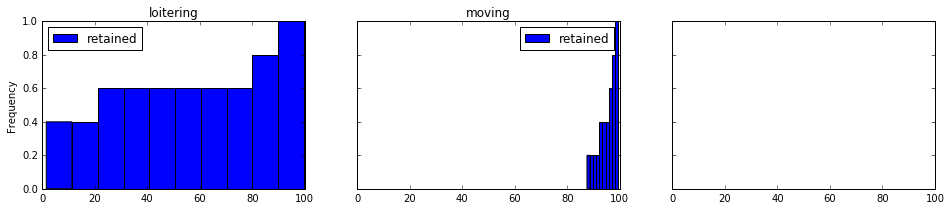

In [182]:
#show how effective the "ground truth" is 
#  -higher retained percentage --> more effective
(ret_fig, ret_axes) = plt.subplots(nrows=1, ncols=3, figsize=(16,3), sharex=True, sharey=True)
for i, (key, df) in enumerate(pd.DataFrame(retained_list).groupby('state')):
    print key
    df.plot(kind='hist', title=key, bins=10, ax=ret_axes[i], cumulative=True, normed=True)

In [83]:
# distance in meters??? 
all_compare_dists = pd.concat(map(lambda row: pd.concat([row['ios_compare'].compare_distance, row['android_compare'].compare_distance]), result_list))

In [84]:
all_compare_dists.head()

1459372436   10.305
1459372437   10.562
1459372438   10.823
1459372439   11.725
1459372440   11.430
Name: compare_distance, dtype: float64

In [85]:
len(all_compare_dists)

76480

In [86]:
all_compare_dists.describe()

count   76480.000
mean       87.393
std       227.932
min         0.026
25%         5.372
50%        11.657
75%        19.171
max      2475.454
Name: compare_distance, dtype: float64

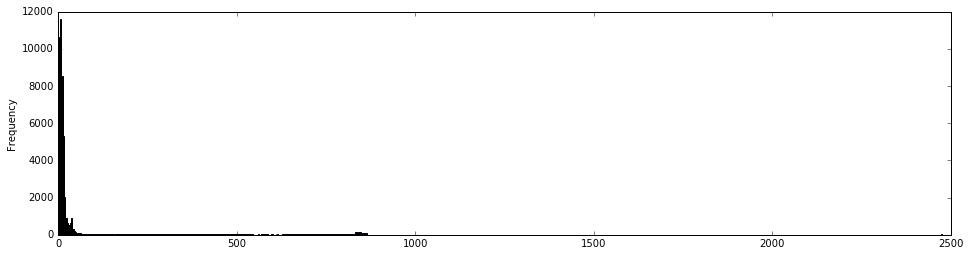

In [87]:
all_compare_dists.plot(kind='hist', figsize=(16,4), bins=1000)

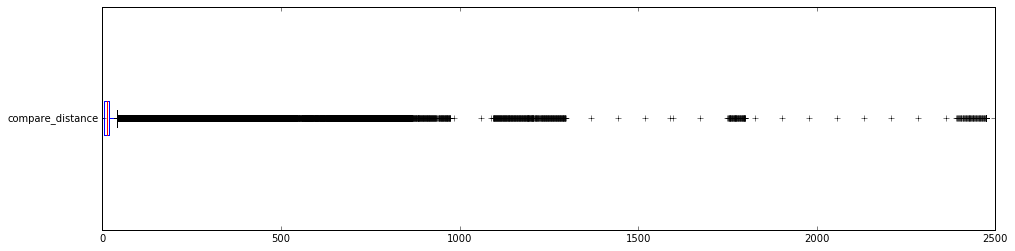

In [88]:
all_compare_dists.plot.box(vert=False, figsize=(16,4))

In [89]:
#1. valid: less than 5000 distance difference 
valid_compare_dists = all_compare_dists[all_compare_dists < 5000]

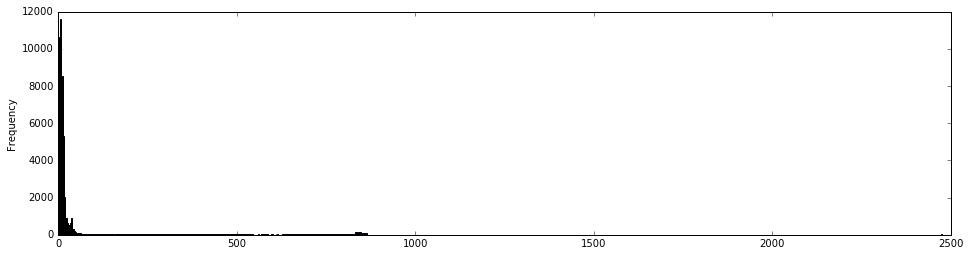

In [90]:
valid_compare_dists.plot(kind='hist', figsize=(16,4), bins=1000)

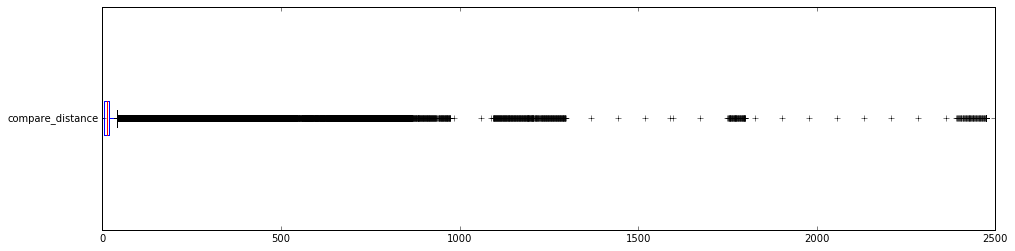

In [91]:
valid_compare_dists.plot.box(vert=False, figsize=(16,4))

In [92]:
#2. valid: less than 1000 distance difference 
valid_compare_dists = all_compare_dists[all_compare_dists < 1000]

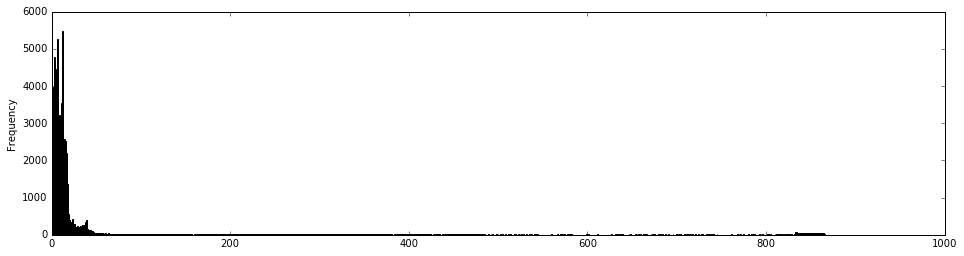

In [93]:
valid_compare_dists.plot(kind='hist', figsize=(16,4), bins=1000)

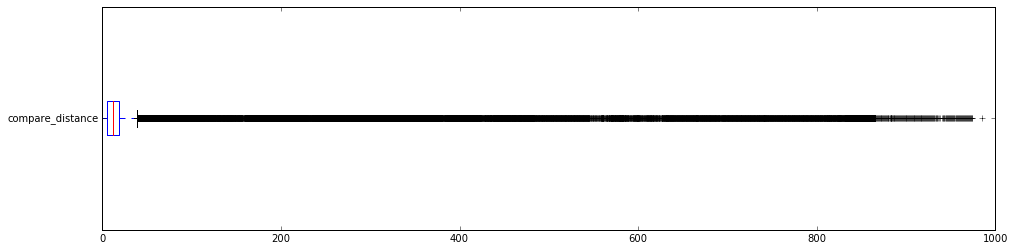

In [94]:
valid_compare_dists.plot.box(vert=False, figsize=(16,4))

In [95]:
#3. valid: less than 200 distance difference 
valid_compare_dists = all_compare_dists[all_compare_dists < 200]

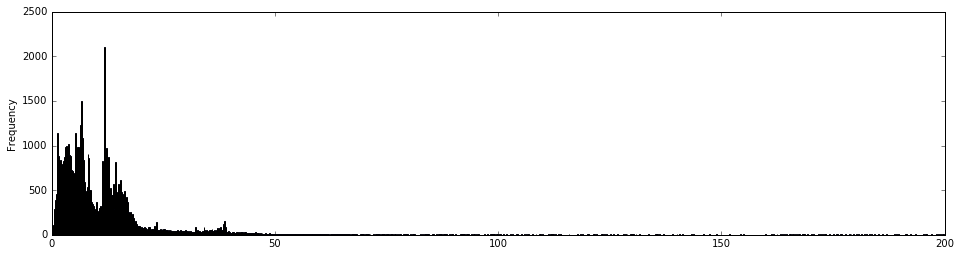

In [96]:
valid_compare_dists.plot(kind='hist', figsize=(16,4), bins=1000)

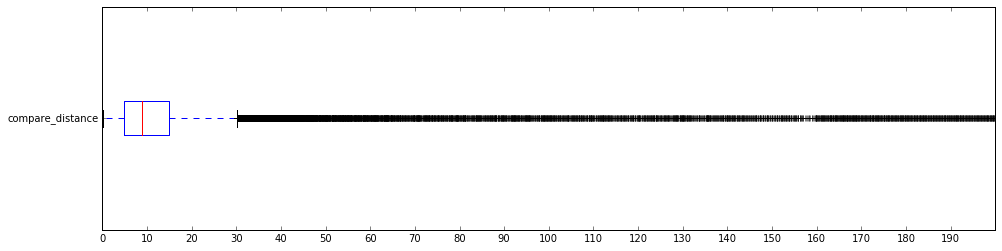

In [97]:
ax = valid_compare_dists.plot.box(vert=False, figsize=(16,4))
tick_list = ax.set_xticks(np.arange(0,valid_compare_dists.max(),10))

In [98]:
def exp_smaller_plots(df, title):
    plt.figure()
    df.plot(kind='hist', figsize=(16,4), bins=1000, title=title)
    plt.figure()
    df.plot.box(vert=False, figsize=(16,4), title=title)
    plt.figure()
    df[df < 5000].plot(kind='hist', figsize=(16,4), bins=1000, title=title)
    plt.figure()
    df[df < 5000].plot.box(vert=False, figsize=(16,4), title=title)
    plt.figure()
    df[df < 1000].plot(kind='hist', figsize=(16,4), bins=1000, title=title)
    plt.figure()
    df[df < 1000].plot.box(vert=False, figsize=(16,4), title=title)
    plt.figure()
    df[df < 200].plot(kind='hist', figsize=(16,4), bins=1000, title=title)    
    plt.figure()
    ax = df[df < 200].plot.box(vert=False, figsize=(16,4), title=title)    
    tick_list = ax.set_xticks(np.arange(0,df[df < 200].max(),10))

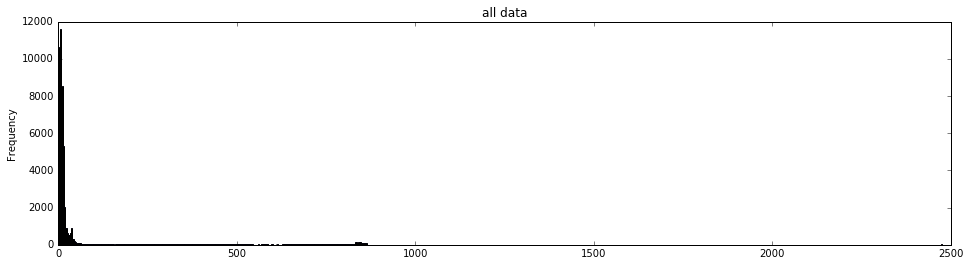

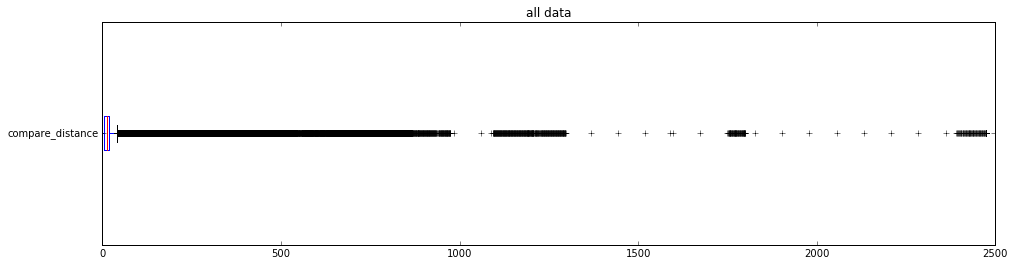

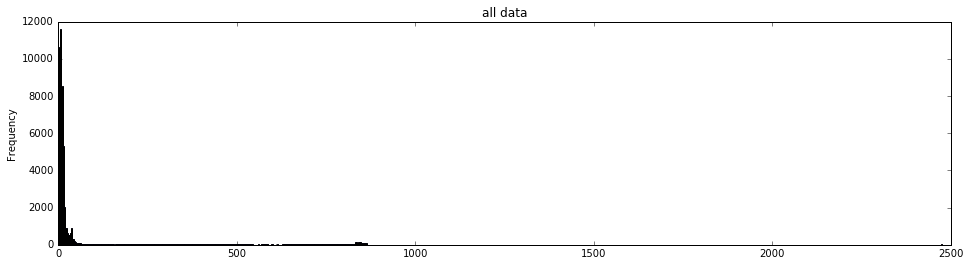

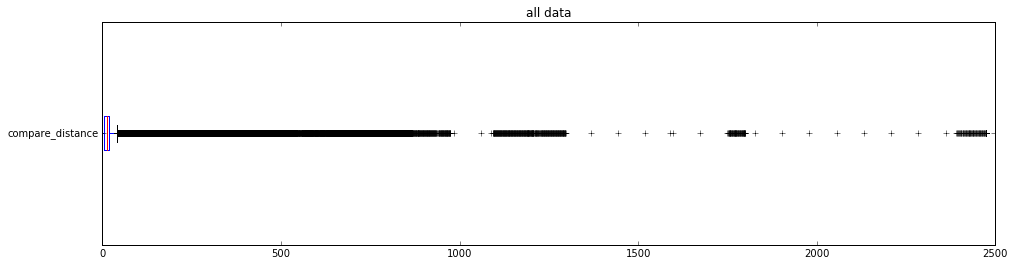

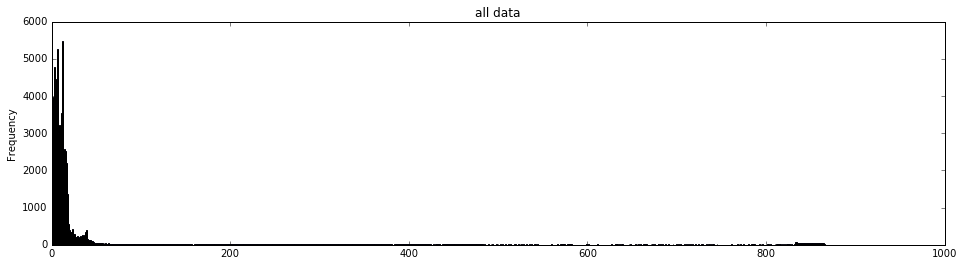

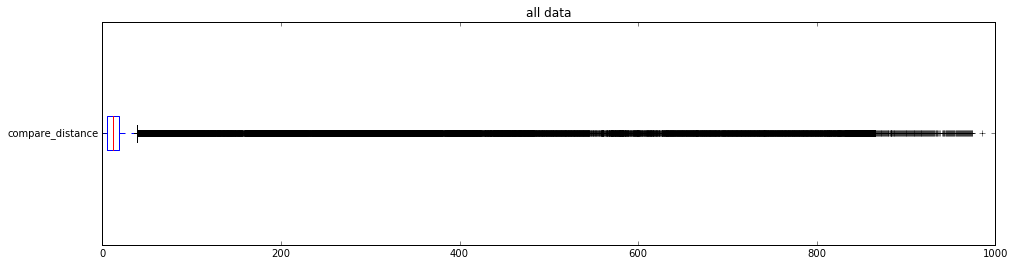

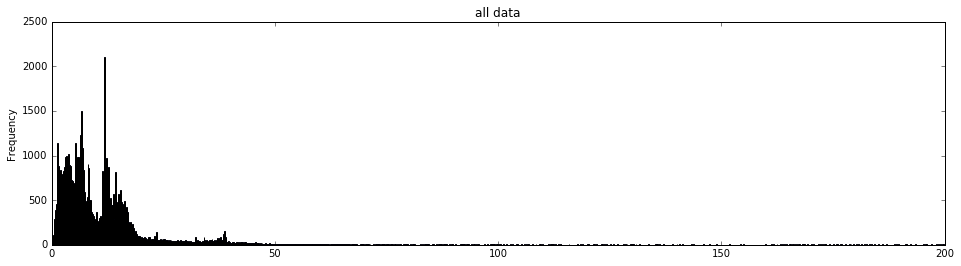

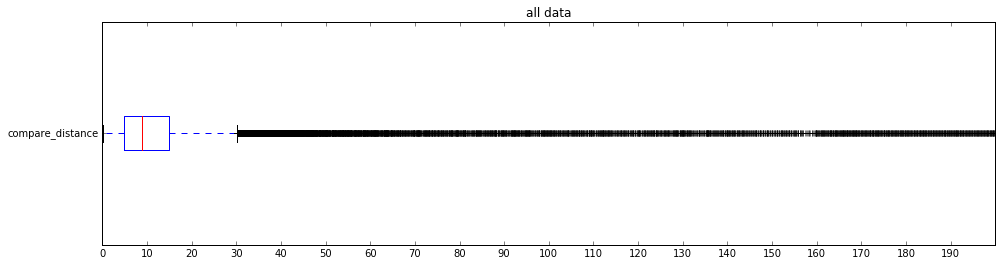

In [99]:
exp_smaller_plots(all_compare_dists, "all data")

In [100]:
moving_compare_dists = pd.concat(map(lambda row: pd.concat([row['ios_compare'].compare_distance, row['android_compare'].compare_distance]),
                                  filter(lambda row: row['state'] == 'moving', result_list)))

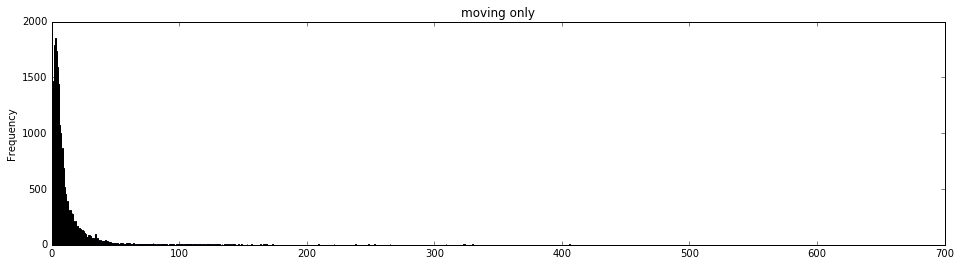

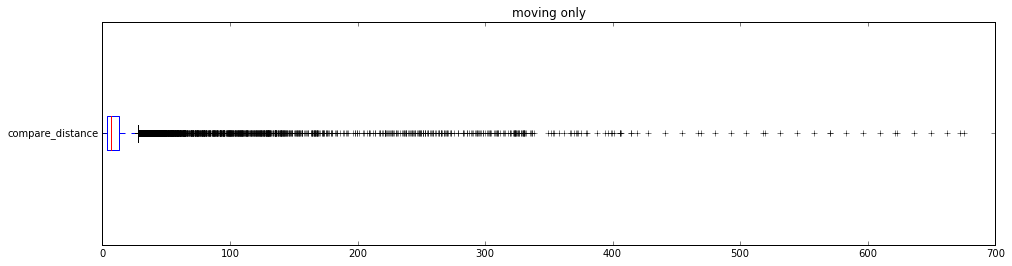

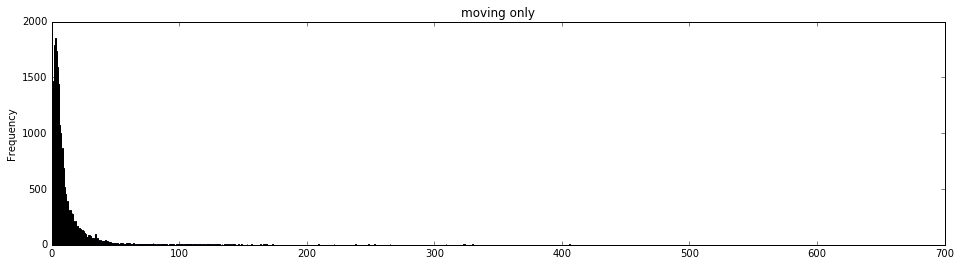

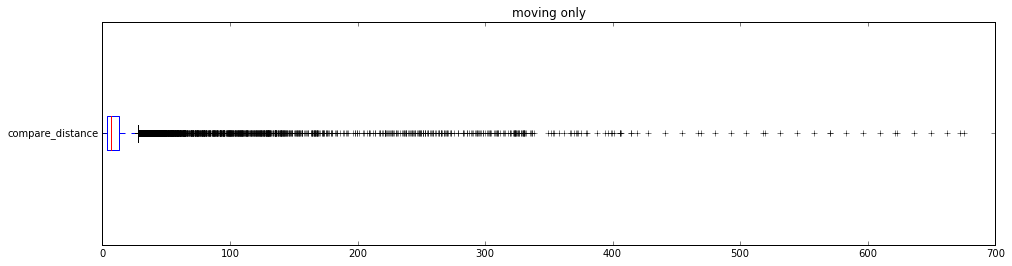

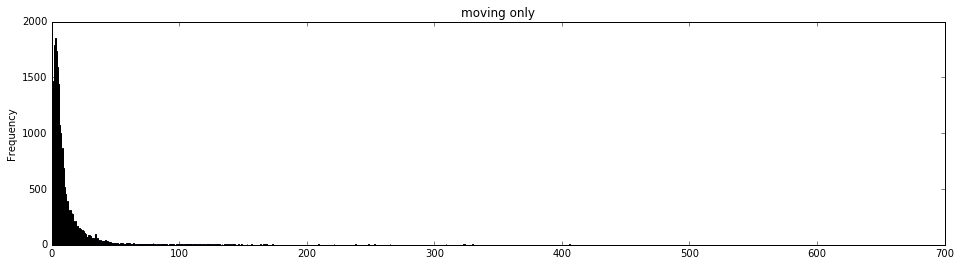

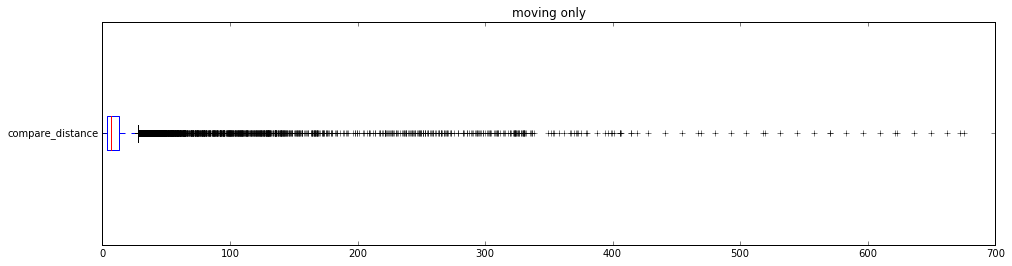

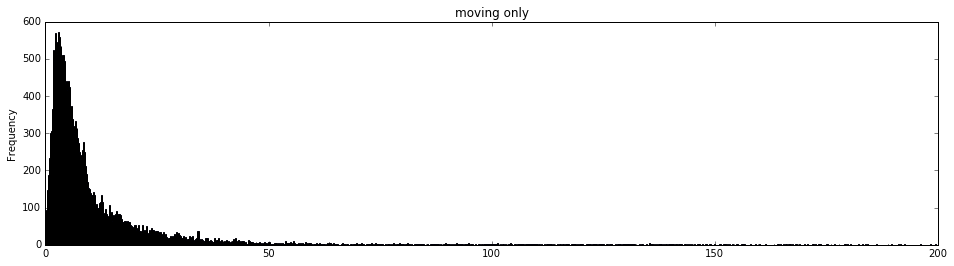

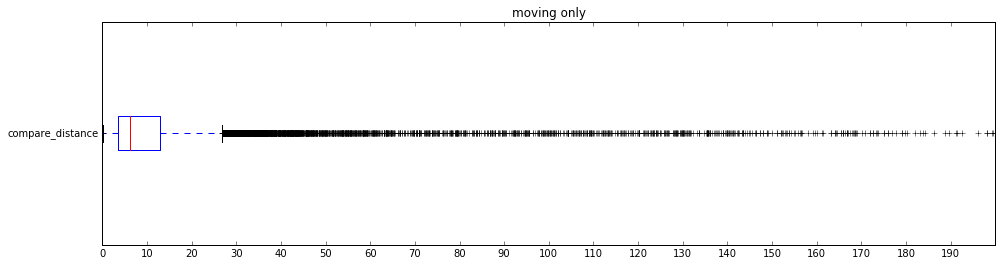

In [101]:
exp_smaller_plots(moving_compare_dists, "moving only")

In [113]:
stationary_compare_dists = pd.concat(map(lambda row: pd.concat([row['ios_compare'].compare_distance, row['android_compare'].compare_distance]),
                                  filter(lambda row: row['state'] == 'stationary', result_list)))

ValueError: No objects to concatenate

In [114]:
exp_smaller_plots(stationary_compare_dists, "stationary only")

NameError: name 'stationary_compare_dists' is not defined

In [115]:
loitering_compare_dists = pd.concat(map(lambda row: pd.concat([row['ios_compare'].compare_distance, row['android_compare'].compare_distance]),
                                  filter(lambda row: row['state'] == 'loitering', result_list)))

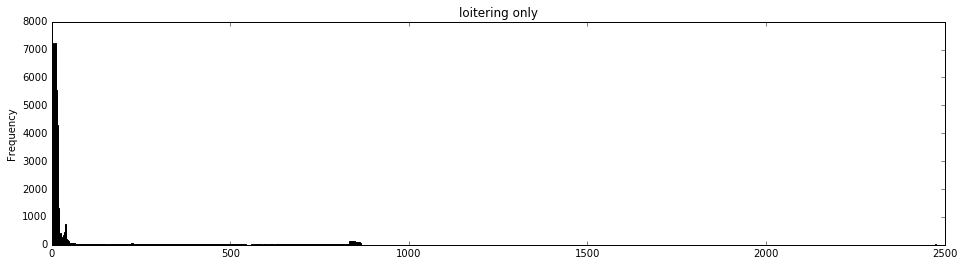

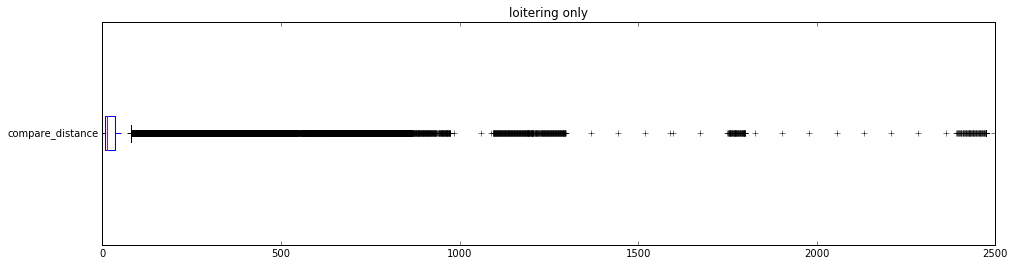

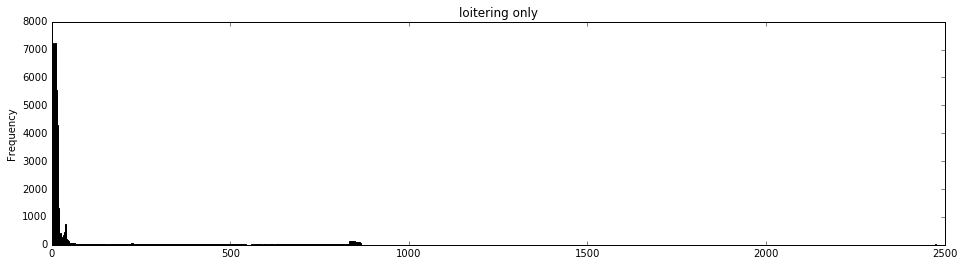

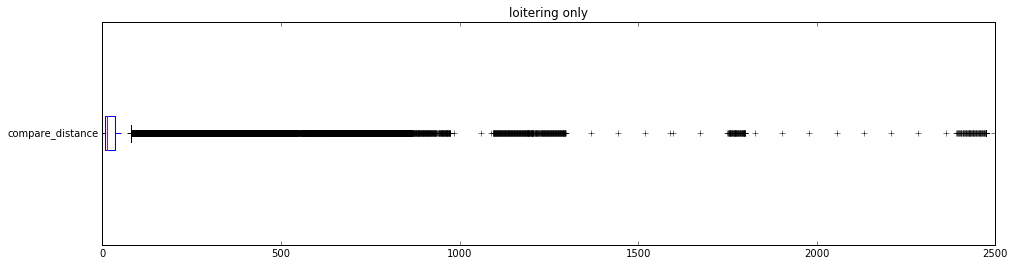

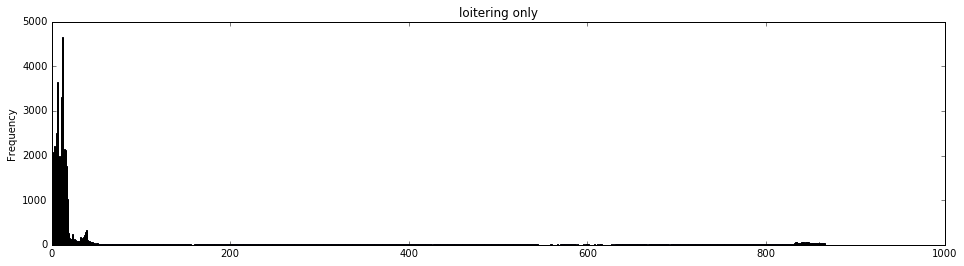

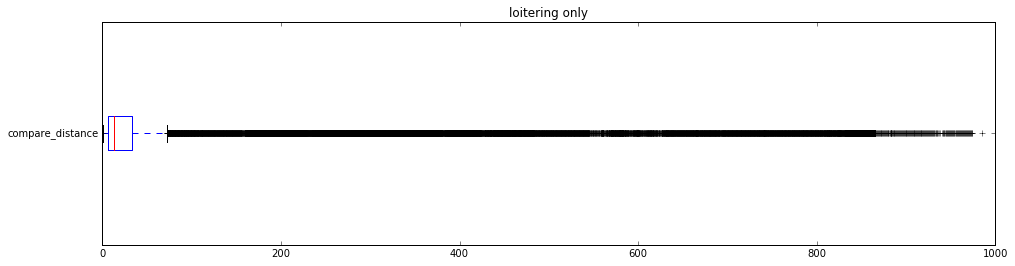

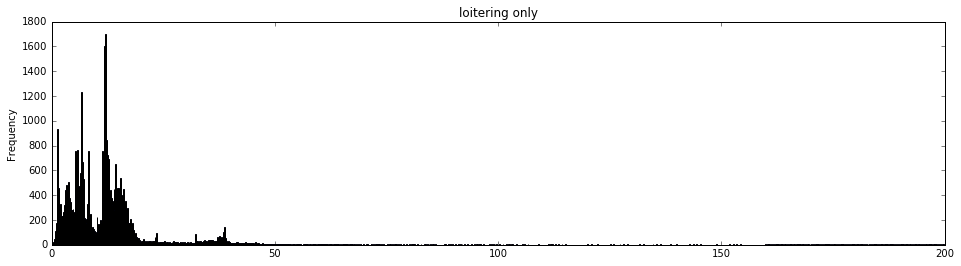

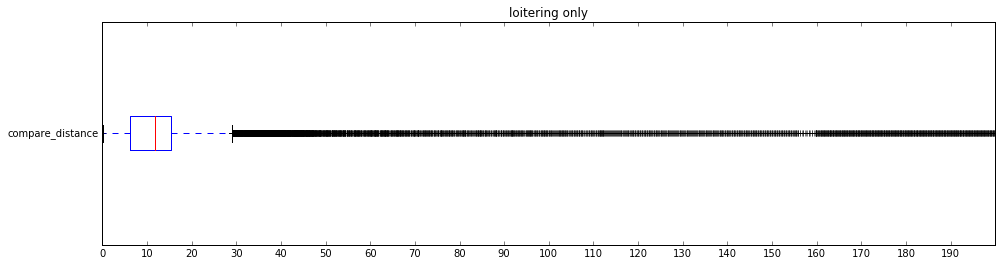

In [116]:
exp_smaller_plots(loitering_compare_dists, "loitering only")

In [117]:
import emission.analysis.intake.cleaning.cleaning_methods.speed_outlier_detection as eaics

In [118]:
#return outlier threshold: Q3+3*iqr
def get_major_threshold(value_series):
    quartile_vals = value_series.quantile([0.25, 0.75])
    logging.debug("quartile values are %s" % quartile_vals)
    iqr = quartile_vals.iloc[1] - quartile_vals.iloc[0]
    logging.debug("iqr %s" % iqr) #inter-quartile-range
    return quartile_vals.iloc[1] + 3 * iqr

In [119]:
outliers = {}
outliers["moving"] = get_major_threshold(moving_compare_dists)
outliers["stationary"] = get_major_threshold(stationary_compare_dists)
outliers["loitering"] = get_major_threshold(loitering_compare_dists)

NameError: name 'stationary_compare_dists' is not defined

In [120]:
def get_accuracy(regime, phone):
    if regime == "high+1sec":
        return "high"
    elif regime == "best+1m":
        return "best"
    elif regime == "high-v-balanced+1sec-v-30sec":
        if phone == 1:
            return "balanced"
        elif phone == 2:
            return "high"
        elif phone == 3:
            return "balanced"
    elif regime == "best-v-10m+1m-v-30m":
        if phone == 1:
            return "10m"
        elif phone == 2:
            return "best"
        elif phone == 3:
            return "10m"
    elif regime == "high-v-balanced+1sec-v-15sec":
        if phone == 1:
            return "balanced"
        elif phone == 2:
            return "high"
        elif phone == 3:
            return "balanced"
    elif regime == "best-v-100m+1m-v-30m":
        if phone == 1:
            return "100m"
        elif phone == 2:
            return "best"
        elif phone == 3:
            return "100m"    
    return "unknown"

In [121]:
outliers

{'moving': 42.249854509242745}

In [122]:
#creating a "dict" = moving_accuracy_distance_series
# with keys = ["high", "balanced", "best", "10m", "100m"]
moving_accuracy_distance_series = {}
for acc in ["high", "balanced", "best", "10m", "100m"]:
    moving_accuracy_distance_series[acc] =[]
    
stationary_accuracy_distance_series = {}
for acc in ["high", "balanced", "best", "10m", "100m"]:
    stationary_accuracy_distance_series[acc] =[]

loitering_accuracy_distance_series = {}
for acc in ["high", "balanced", "best", "10m", "100m"]:
    loitering_accuracy_distance_series[acc] =[]

In [123]:
#result_list: list of dicts
for entry in result_list:
    if entry['state'] == 'moving':
        moving_accuracy_distance_series[get_accuracy(entry['ios_regime'], entry['phone'])].append(entry['ios_compare'].compare_distance)
        moving_accuracy_distance_series[get_accuracy(entry['android_regime'], entry['phone'])].append(entry['android_compare'].compare_distance)
    elif entry['state'] == 'stationary':
        stationary_accuracy_distance_series[get_accuracy(entry['ios_regime'], entry['phone'])].append(entry['ios_compare'].compare_distance)
        stationary_accuracy_distance_series[get_accuracy(entry['android_regime'], entry['phone'])].append(entry['android_compare'].compare_distance)
    elif entry['state'] == 'loitering':
        loitering_accuracy_distance_series[get_accuracy(entry['ios_regime'], entry['phone'])].append(entry['ios_compare'].compare_distance)
        loitering_accuracy_distance_series[get_accuracy(entry['android_regime'], entry['phone'])].append(entry['android_compare'].compare_distance)        

In [124]:
def compareState(accuracy_distance_series):
    nOutliers = {}
    outlierPct = {}
    nonOutlierMean = {}
    nonOutlierMedian = {}
    for accuracy in moving_accuracy_distance_series:
        curr_accuracy_list = accuracy_distance_series[accuracy]
        curr_accuracy_merged = pd.concat(curr_accuracy_list)
        curr_non_outliers_merged = curr_accuracy_merged[curr_accuracy_merged < outliers['moving']]
        nOutliers[accuracy] = np.count_nonzero(curr_accuracy_merged > outliers['moving'])
        outlierPct[accuracy] = float(nOutliers[accuracy] * 100) / len(curr_accuracy_merged)
        nonOutlierMean[accuracy] = curr_non_outliers_merged.mean()
        nonOutlierMedian[accuracy] = curr_non_outliers_merged.median()
    return pd.DataFrame(data={"outlierPct": outlierPct, "nonOutlierMean": nonOutlierMean, "nonOutlierMedian": nonOutlierMedian})

In [125]:
moving_accuracy_results = compareState(moving_accuracy_distance_series)
stationary_accuracy_results = compareState(stationary_accuracy_distance_series)
loitering_accuracy_results = compareState(loitering_accuracy_distance_series)

ValueError: No objects to concatenate

NameError: name 'moving_accuracy_results' is not defined

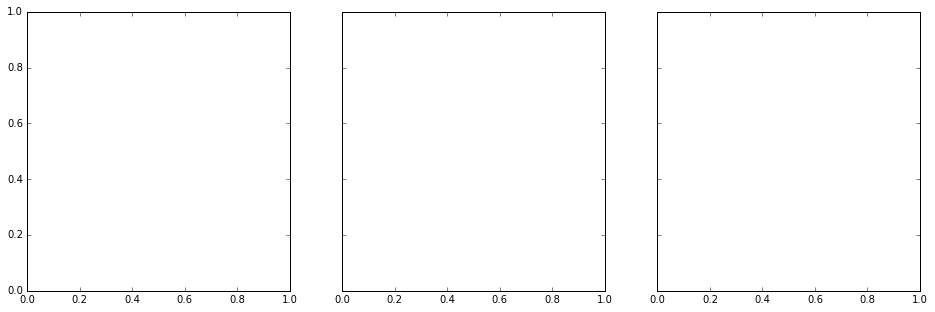

In [126]:
(fig, axes) = plt.subplots(nrows=1, ncols=3, figsize=(16,5), sharey=True)
moving_accuracy_results.plot(kind='bar', ax=axes[0], title="moving")
stationary_accuracy_results.plot(kind='bar', ax=axes[1], title="stationary")
loitering_accuracy_results.plot(kind='bar', ax=axes[2], title="loitering")

In [127]:
all_threshold = get_major_threshold(all_compare_dists)

In [128]:
all_threshold

60.566564246021144

In [ ]:
all_accuracy_distance_series = {}
for acc in ["high", "balanced", "best", "10m", "100m"]:
    all_accuracy_distance_series[acc] =[]

In [ ]:
for entry in result_list:
    all_accuracy_distance_series[get_accuracy(entry['ios_regime'], entry['phone'])].append(entry['ios_compare'].compare_distance)
    all_accuracy_distance_series[get_accuracy(entry['android_regime'], entry['phone'])].append(entry['android_compare'].compare_distance)

In [103]:
all_accuracy_results = compareState(all_accuracy_distance_series)

NameError: name 'compareState' is not defined

In [104]:
all_accuracy_results.plot(kind='bar', title="all data")

NameError: name 'all_accuracy_results' is not defined

In [105]:
def get_accuracy(regime, phone):
    if regime == "high+1sec":
        return "high-1"
    elif regime == "best+1m":
        return "best"
    elif regime == "high-v-balanced+1sec-v-30sec":
        if phone == 1:
            return "balanced-1"
        elif phone == 2:
            return "high-30"
        elif phone == 3:
            return "balanced-30"
    elif regime == "best-v-10m+1m-v-30m":
        if phone == 1:
            return "10m"
        elif phone == 2:
            return "best"
        elif phone == 3:
            return "10m"
    elif regime == "high-v-balanced+1sec-v-15sec":
        if phone == 1:
            return "balanced-1"
        elif phone == 2:
            return "high-15"
        elif phone == 3:
            return "balanced-15"
    elif regime == "best-v-100m+1m-v-30m":
        if phone == 1:
            return "100m"
        elif phone == 2:
            return "best"
        elif phone == 3:
            return "100m"    
    return "unknown"

In [106]:
moving_accuracy_distance_series = {}
for acc in ["high-1", "balanced-1", "high-15", "balanced-15", "high-30", "balanced-30", "best", "10m", "100m"]:
    moving_accuracy_distance_series[acc] =[]
    
stationary_accuracy_distance_series = {}
for acc in ["high-1", "balanced-1", "high-15", "balanced-15", "high-30", "balanced-30",  "best", "10m", "100m"]:
    stationary_accuracy_distance_series[acc] =[]

loitering_accuracy_distance_series = {}
for acc in ["high-1", "balanced-1", "high-15", "balanced-15", "high-30", "balanced-30", "best", "10m", "100m"]:
    loitering_accuracy_distance_series[acc] =[]
    
all_accuracy_distance_series = {}
for acc in ["high-1", "balanced-1", "high-15", "balanced-15", "high-30", "balanced-30",  "best", "10m", "100m"]:
    all_accuracy_distance_series[acc] =[]

In [107]:
for entry in result_list:
    # print "For entry %s %s %s accuracies are %s and %s" % (entry['ios_regime'], entry['android_regime'], entry['phone'],
    #                                                  get_accuracy(entry['ios_regime'], entry['phone']), get_accuracy(entry['android_regime'], entry['phone']))
    all_accuracy_distance_series[get_accuracy(entry['ios_regime'], entry['phone'])].append(entry['ios_compare'].compare_distance)
    all_accuracy_distance_series[get_accuracy(entry['android_regime'], entry['phone'])].append(entry['android_compare'].compare_distance)

In [108]:
print all_accuracy_distance_series.keys()
print map(lambda key: len(all_accuracy_distance_series[key]), all_accuracy_distance_series.keys())

['100m', 'high-1', '10m', 'balanced-1', 'high-30', 'balanced-15', 'high-15', 'balanced-30', 'best']
[0, 0, 15, 9, 7, 0, 0, 6, 7]


In [109]:
all_accuracy_results = compareState(all_accuracy_distance_series)

NameError: name 'compareState' is not defined

In [110]:
len(all_accuracy_distance_series['high-15'])

0

In [111]:
all_accuracy_results.plot(kind='bar', title="all data")

NameError: name 'all_accuracy_results' is not defined

In [112]:
all_accuracy_results.to_csv(open("/tmp/accuracy_results.csv", "w"))

NameError: name 'all_accuracy_results' is not defined